In [2]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report, precision_recall_curve, accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv(r'C:\Users\GREEN ARW\OneDrive\Desktop\Machine Learning\Data\tested.csv')

In [4]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [5]:
print(df.shape)
print(df.columns.tolist())
df.head()

(418, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.columns = df.columns.str.strip()

In [7]:
# معلومات عامة
print(df.info())
print(df.describe(include='all').T)

# نسب القيم المفقودة
print(df.isnull().mean().sort_values(ascending=False).head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None
             count unique               top freq       mean         std  \
PassengerId  418.0    NaN               NaN  NaN     1100.5  120.810458   
Survived     418.0    NaN               NaN  NaN   0.363636    0.481622   
Pclass       4

In [8]:
print("duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("duplicates after:", df.duplicated().sum())

duplicates before: 0
duplicates after: 0


In [9]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if pd.api.types.is_numeric_dtype(df[col]):
            df[col].fillna(df[col].mean(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

C:\Users\GREEN ARW\AppData\Local\Temp\ipykernel_18508\3714659284.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\GREEN ARW\AppData\Local\Temp\ipykernel_18508\3714659284.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [10]:
print(df.isnull().sum().sum())

0


In [11]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\GREEN ARW\AppData\Local\Temp\ipykernel_18508\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [12]:
df['Fare'].fillna(df['Fare'].median(), inplace=True)

C:\Users\GREEN ARW\AppData\Local\Temp\ipykernel_18508\309285478.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fare'].fillna(df['Fare'].median(), inplace=True)


In [13]:
df.drop(columns=['Cabin', 'Name', 'Ticket', 'PassengerId'], inplace=True)  # مش هتفيد في الموديل


In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [15]:
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [16]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values after cleaning:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


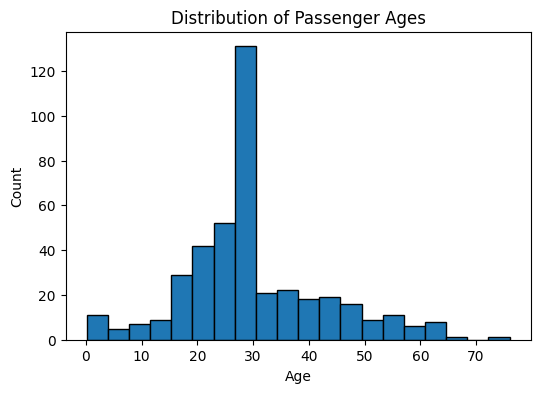

In [17]:
plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title('Distribution of Passenger Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

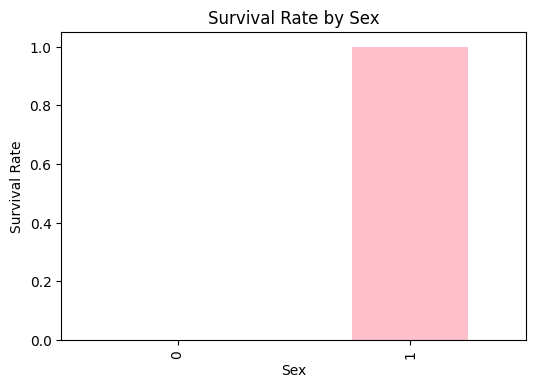

In [18]:
plt.figure(figsize=(6,4))
df.groupby('Sex')['Survived'].mean().plot(kind='bar', color=['skyblue', 'pink'])
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

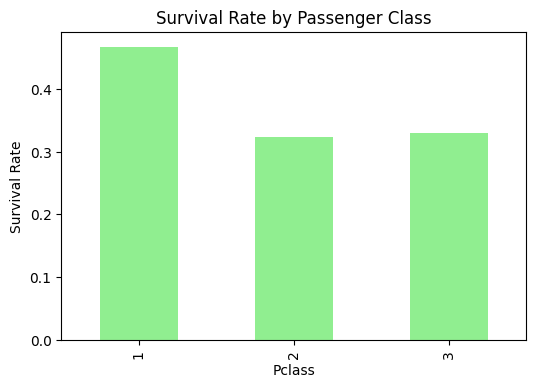

In [19]:
plt.figure(figsize=(6,4))
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', color='lightgreen')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

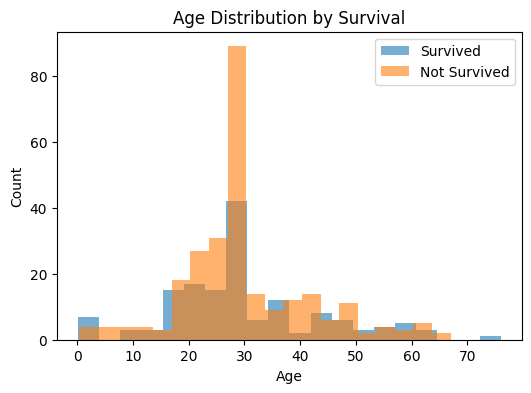

In [20]:
plt.figure(figsize=(6,4))
df[df['Survived']==1]['Age'].plot(kind='hist', alpha=0.6, label='Survived', bins=20)
df[df['Survived']==0]['Age'].plot(kind='hist', alpha=0.6, label='Not Survived', bins=20)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()

In [21]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [22]:
X = df.drop('Survived', axis=1)  
y = df['Survived']  

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
df.to_csv("../Data/tested_cleaned.csv", index=False)

KNN

In [25]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6190476190476191

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.84      0.72        50
           1       0.56      0.29      0.38        34

    accuracy                           0.62        84
   macro avg       0.60      0.57      0.55        84
weighted avg       0.60      0.62      0.59        84



SMOTE + LOGISTICREGRESSION

In [27]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [28]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
model.fit(X_train_res, y_train_res)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [29]:
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [30]:
thresholds = np.arange(0.05, 1.0, 0.05)
best_recall = 0
best_threshold = 0
results = []

In [31]:
for t in thresholds:
    y_pred_class = (y_pred_prob >= t).astype(int)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    results.append((t, precision, recall, f1))
    
    if recall > best_recall:
        best_recall = recall
        best_threshold = t

In [32]:
for t, p, r, f1 in results:
    print(f"Threshold: {t:.2f} | Precision: {p:.2f} | Recall: {r:.2f} | F1: {f1:.2f}")

Threshold: 0.05 | Precision: 0.97 | Recall: 1.00 | F1: 0.99
Threshold: 0.10 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.15 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.20 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.25 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.30 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.35 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.40 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.45 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.50 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.55 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.60 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.65 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.70 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.75 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.80 | Precision: 1.00 | Recall: 1.00 | F1: 1.00
Threshold: 0.85 | Precision: 1.00 | Reca

In [33]:
print(f"\nThe best Threshold for Recall: {best_threshold} | Recall: {best_recall}")


The best Threshold for Recall: 0.05 | Recall: 1.0


In [34]:
y_pred_best = (y_pred_prob >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       0.97      1.00      0.99        34

    accuracy                           0.99        84
   macro avg       0.99      0.99      0.99        84
weighted avg       0.99      0.99      0.99        84



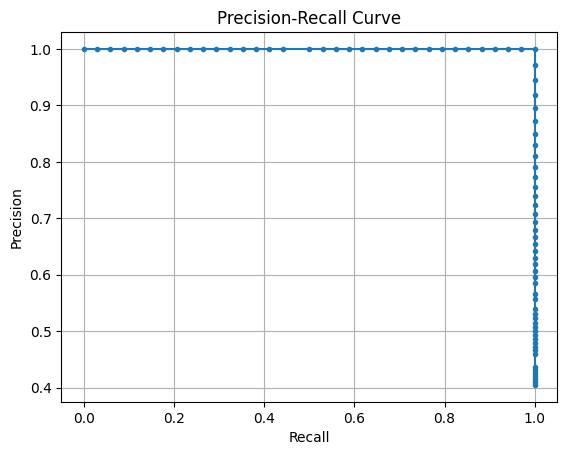

In [35]:
precisions, recalls, thres = precision_recall_curve(y_test, y_pred_prob)
plt.plot(recalls, precisions, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

In [36]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [37]:
model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [38]:
y_probs = model.predict_proba(X_test)[:, 1]

In [39]:
threshold = 0.4  
y_pred = (y_probs >= threshold).astype(int)

In [40]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
 [[50  0]
 [ 0 34]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [41]:
joblib.dump(model, "../models/logistic_regression_smote.pkl")
print("✅ The model has been saved. logistic_regression_smote.pkl")

✅ The model has been saved. logistic_regression_smote.pkl


In [42]:
model_loaded = joblib.load("../models/logistic_regression_smote.pkl")


y_pred_prob = model_loaded.predict_proba(X_test)[:, 1]
y_pred_class = (y_pred_prob >= 0.35).astype(int)  


from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

